<a href="https://colab.research.google.com/github/benedetta-c/workshop_tsim/blob/main/TSIM_Python_ML_Workshop_surname1_surname2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Advanced Methods in Medical Signals and Images: Python & ML Workshop***

Welcome to the Python & ML Workshop of the subject, where you will learn how to perform some data science tasks in Python by using Google Colab and multiple commonly-used libraries.

To get started, follow the following steps:

1.   Sign in with your Google account (upper left button)
1.   Click in *File/Save a copy in Drive*
2.   Change the name of the norbook by double clicking in the name of the file (upper right field), with the format TSIM_Python_ML_Workshop_surname1_surname2.ipynb
3. Click on *Connect* (upper left corner)
4. Now you can start editing the notebook! The modified notebook will be saved in your Drive account. When you are finished, click on *File/Download .ipynb* to export the file and upload it to Moodle.



Double click here to edit your name and surname

**NAME AND SURNAME:**

**NAME AND SURNAME:**

[Advanced Methods in Medical Signals and Images: Python & ML Workshop](#scrollTo=kvMNe0-LOE8S)

>[PART 1 - Exploring Survival on Titanic](#scrollTo=GDt0sTITEO3y)

>>[1.1 - Load dataset](#scrollTo=8TpbPOtrGFm5)

>>[1.2 - Preview dataset](#scrollTo=e7m5MqP1HhI3)

>>>[1.2.1 - Generate descriptive statistics](#scrollTo=pcLKNDYxH0EA)

>>>[1.2.2 - Show null columns](#scrollTo=zOO7AtBcH_Af)

>>>[1.2.3 - Show missing values](#scrollTo=atq79PlDIGdg)

>>>[1.2.4 - Visualize the target variable](#scrollTo=62tvtD7RIdDP)

>>>[1.2.5 - Survival by age](#scrollTo=q2ffHEzDI3mv)

>>>[1.2.6 - Survival by gender](#scrollTo=uRZYWa1SJAz_)

>>>[1.2.7 - Survivers by class](#scrollTo=2BOrU0_CJKXH)

>>>[1.2.8 - Survivers by port of embarkation](#scrollTo=0o8DJpIrJi-3)

>>[1.3 - Initiate independent and dependent variables](#scrollTo=uYthnGhRJwC3)

>>[1.4 - Feature engineering](#scrollTo=iKxL9XUkLUoe)

>>[1.5 - Preprocess data with Scikit-Learn](#scrollTo=ZlcT_2sYLrfG)

>>>[1.5.1 - Remove features that we don't want](#scrollTo=m73cqs6TL6xf)

>>>[1.5.2 - Fill missing values (imputation)](#scrollTo=4MNGqyx-MCcr)

>>>[1.5.3 - Handle categorical data](#scrollTo=C7oOTsHfMCgq)

>>>[1.5.4 - Scale numeric data](#scrollTo=hNM6IsTKMCkm)

>>[1.6 - Split into Training and Testing Sets](#scrollTo=fCjR5C2pOUdl)

>>[1.7 - Classification task](#scrollTo=Htes449IPIxN)

>>>[1.7.1 - Create classifiers](#scrollTo=qIX_n0_JQz80)

>>>[1.7.2 - Train classifiers](#scrollTo=IA-KA9ECQ2jl)

>>>[1.7.3 - Measure performance of the model](#scrollTo=Ck8VOySeR7xr)

>[PART 2 - A quick glance at manual feature extraction](#scrollTo=Bp1EsomzEq0x)

>>[2.1 - Load images](#scrollTo=skn-WikqWxVx)

>>[2.2 - Preprocess images](#scrollTo=e425sDr7W1K5)

>>[2.3 - Visualize images](#scrollTo=j5YE_zaXY44o)

>>[2.4 - Manual extraction of features](#scrollTo=uhMAdCcsZfbv)

>>[2.5 - Visualize features extracted](#scrollTo=QQOAGoJ4cJ19)

>[PART 3 - Playing aroung with a Multilayer Perceptron (MLP) and training parameters](#scrollTo=3KO0Q0XxkAPo)

>[[RECOMMENDED] Useful Resources](#scrollTo=ffL-F9Eekfzu)



Below are some packages we are going to use in this workshop:

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
import cv2

# PART 1 - Exploring Survival on Titanic

## 1.1 - Load dataset

Here, we are going to load the Titanic dataset and store them in a Pandas Dataframe (see more info about DataFrames [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html)), which we will call `df`. `df` has both the input information and the ground truth label of what we want to estimate, the survival (column `target`).

In [32]:
# Load dataset
titanic = fetch_openml('titanic', version=1, as_frame=True)
df = titanic['data']
df['survived'] = titanic['target']

## 1.2 - Preview dataset

Let's start by undestanding our dataset. In order to print the three first entries of our dataframe, we will use the `head` method. If we only put `df` (the DataFrame itself), we will print as many entries as we can via `stdout` (standard output), which sometimes may be messy due to all the data we have.

In [33]:
df.head(3)

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0


In [34]:
df.columns

Index(['pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare',
       'cabin', 'embarked', 'boat', 'body', 'home.dest', 'survived'],
      dtype='object')

### 1.2.1 - Generate descriptive statistics

In [35]:
df.describe()

,pclass,age,sibsp,parch,fare,body
count,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,80.000000,8.000000,9.000000,512.329200,328.000000


### 1.2.2 - Show null columns

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   int64   
 1   name       1309 non-null   object  
 2   sex        1309 non-null   category
 3   age        1046 non-null   float64 
 4   sibsp      1309 non-null   int64   
 5   parch      1309 non-null   int64   
 6   ticket     1309 non-null   object  
 7   fare       1308 non-null   float64 
 8   cabin      295 non-null    object  
 9   embarked   1307 non-null   category
 10  boat       486 non-null    object  
 11  body       121 non-null    float64 
 12  home.dest  745 non-null    object  
 13  survived   1309 non-null   category
dtypes: category(3), float64(3), int64(3), object(5)
memory usage: 116.8+ KB


### 1.2.3 - Show missing values

In [37]:
df.isnull().sum()

pclass          0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
survived        0
dtype: int64

As we can observe, a lot of columns are missing values. Let's visualize this better:

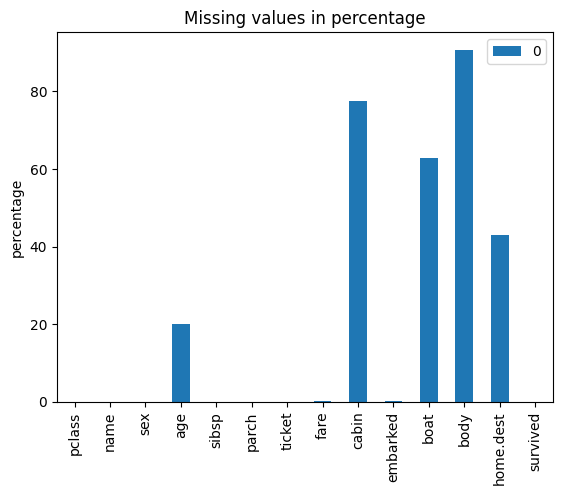

In [38]:
miss_vals = pd.DataFrame(df.isnull().sum() / len(df) * 100)
miss_vals.plot(kind='bar',
    title='Missing values in percentage',
    ylabel='percentage'
    )

plt.show()

### 1.2.4 - Visualize the target variable

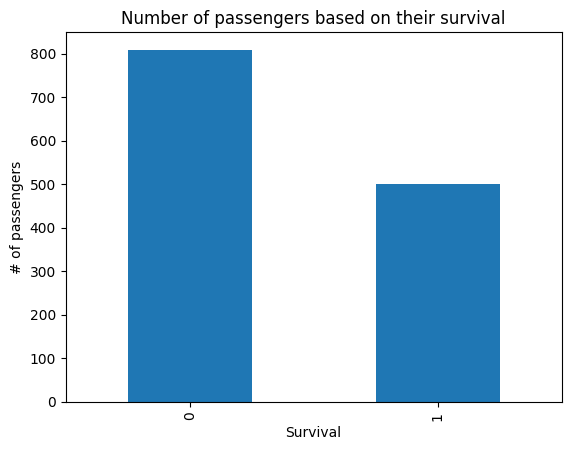

In [39]:
df.survived.value_counts().plot(kind='bar')

plt.xlabel('Survival')
plt.ylabel('# of passengers')
plt.title('Number of passengers based on their survival')
plt.show()

### 1.2.5 - Survival by age

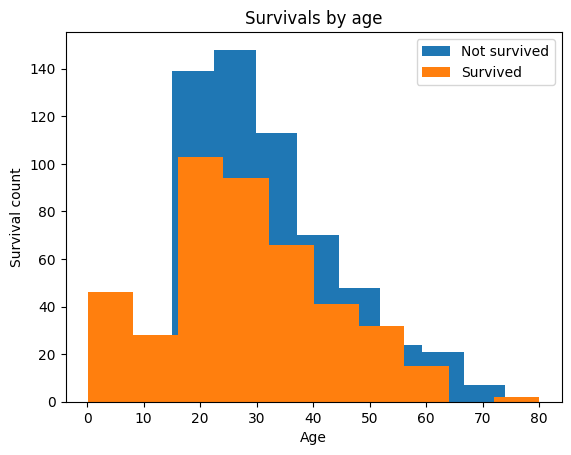

In [40]:
fig, ax = plt.subplots()

ax.hist(df['age'][df.survived == '0'].dropna(), label='Not survived')
ax.hist(df['age'][df.survived == '1'].dropna(), label='Survived')

plt.xlabel('Age')
plt.ylabel('Survival count')
plt.title('Survivals by age')
plt.legend()
plt.show()

### 1.2.6 - Survival by gender

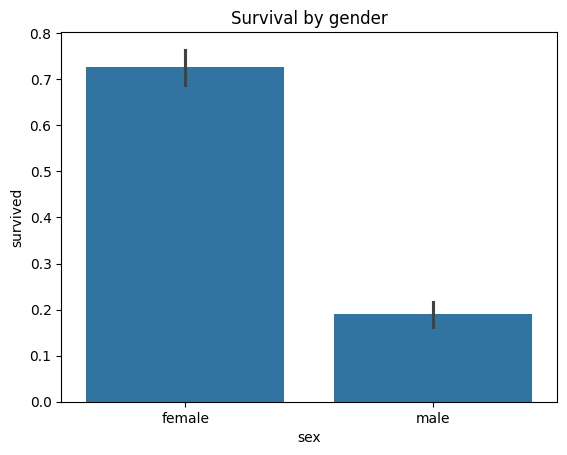

In [41]:
df['survived'] = df.survived.astype('int')

sns.barplot(
    x='sex',
    y='survived',
    data=df
)

plt.title('Survival by gender')
plt.show()

### 1.2.7 - Survivers by class

We can visualize survivers by class wither by counting them (absolute) or by using a percentage of the total (relative)

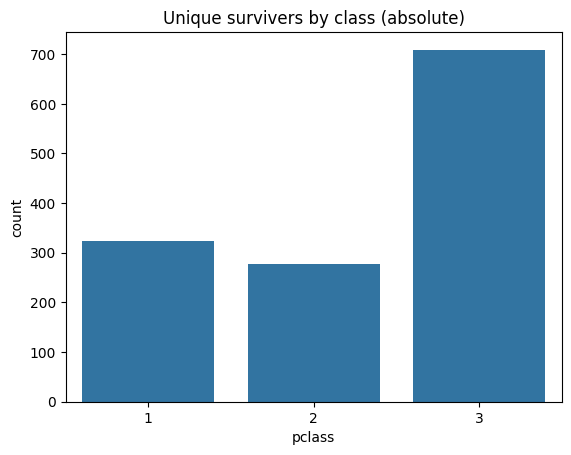

In [42]:
sns.countplot(x='pclass', data=df)
plt.title('Unique survivers by class (absolute)')
plt.show()

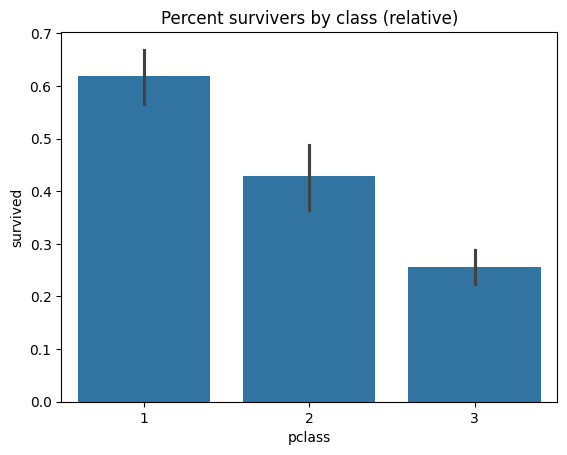

In [43]:
sns.barplot(x='pclass', y='survived', data=df)
plt.title('Percent survivers by class (relative)')
plt.show()

### 1.2.8 - Survivers by port of embarkation

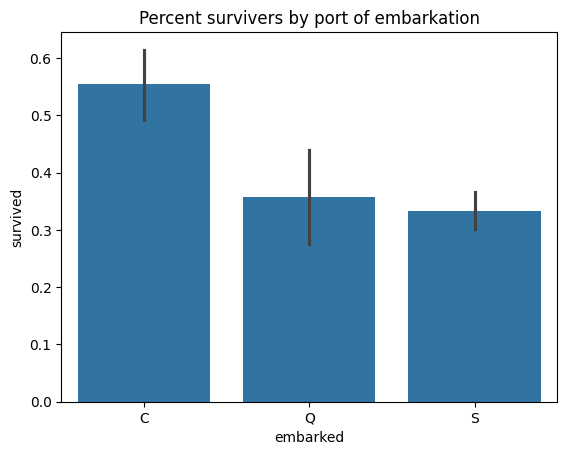

In [44]:
sns.barplot(x='embarked', y='survived', data=df)
plt.title('Percent survivers by port of embarkation')
plt.show()

## 1.3 - Initiate independent and dependent variables

Classification algorithms will try to classify targets (dependent variables) using the features (independent variables) as predictors.

Here, the column that we want to make a prediction on is the column that states whether or not the passenger survived (column name = `target`).

We can assign the features to **`X`** by using the `drop` method to keep all columns except the target and assigning the target to **`y`**.

In [45]:
# Assign Dependent and Independent variables
X = df.drop('survived', axis=1)
y = df['survived']

## 1.4 - Feature engineering

Some features don’t have much meaning when used alone. However, we can give them meaning by looking at the context.

For example, the `sibsp` and `parch` columns tell you if the passenger was travelling with siblings, parents or children. By combining these features, you can infer if the passenger was travelling alone, and see if that impacted the chances of survival.

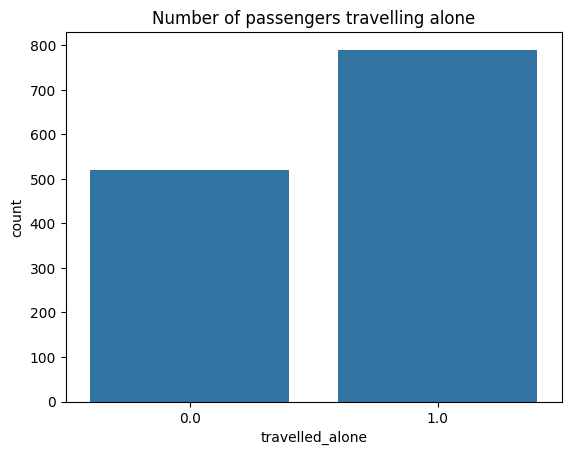

In [46]:
X['family'] = X['sibsp'] + X['parch']
X.loc[X['family'] > 0, 'travelled_alone'] = 0
X.loc[X['family'] == 0, 'travelled_alone'] = 1
X.drop(['family', 'sibsp', 'parch'], axis=1, inplace=True)
sns.countplot(x='travelled_alone', data=X)
plt.title('Number of passengers travelling alone')
plt.show()

## 1.5 - Preprocess data with Scikit-Learn

In this section, we will use Scikit-Learn. For further information, [here](https://scikit-learn.org/stable/) is their official webpage.

There are two main reasons why you want to do data preprocessing before training your machine learning model:

- To satisfy the requirements of the scikit-learn api
- To clean erroneous and missing data from datasets

Hence, we will:

- Remove features that we don’t want
- Fill missing values
- Convert categorical data features to numeric format
- Scale numeric features

### 1.5.1 - Remove features that we don't want

**Exercise:** Complete the following lines of code marked with **TODO** (To-Do) in order to remove those features we don't want

In [48]:
# TODO: remove high missing value columns: 'cabin', 'boat' and 'body'
X.drop('cabin', axis=1, inplace=True)
X.drop('boat', axis=1, inplace=True)
X.drop('body', axis=1, inplace=True)
 
# TODO: remove less interesting features: 'name', 'ticket' and 'home.dest'
X.drop('name', axis=1, inplace=True)
X.drop('ticket', axis=1, inplace=True)
X.drop('home.dest', axis=1, inplace=True)


### 1.5.2 - Fill missing values (imputation)

To use Scikit-learn, you should have no missing values in your dataset.

Thus, using `SimpleImputer`, we will fill the missing values using the `mean` for numeric data, and the `most_frequent` value for categorical data.

In [53]:
from sklearn.impute import SimpleImputer

def get_parameters(df):
    parameters = {}
    for col in df.columns[df.isnull().any()]:
        if df[col].dtype == 'float64' or df[col].dtype == 'int64' or df[col].dtype =='int32':
            strategy = 'mean'
        else:
            strategy = 'most_frequent'
        missing_values = df[col][df[col].isnull()].values[0]
        parameters[col] = {'missing_values':missing_values, 'strategy':strategy}
    return parameters

parameters = get_parameters(X)

for col, param in parameters.items():
    missing_values = param['missing_values']
    strategy = param['strategy']
    imp = SimpleImputer(missing_values=missing_values, strategy=strategy)
    X[col] = imp.fit_transform(X[[col]]).ravel()

X.isnull().sum()

pclass             0
sex                0
age                0
fare               0
embarked           0
travelled_alone    0
dtype: int64

### 1.5.3 - Handle categorical data

Scikit learn requires `categorical` data to be converted into continuous numeric format. Using the `pandas` `get_dummies` method, we will convert categorical features into 0s and 1s.

In [ ]:
# handle categorical data
cat_cols = X.select_dtypes(include=['object','category']).columns
dummies = pd.get_dummies(X[cat_cols], drop_first=True)
X[dummies.columns] = dummies
X.drop(cat_cols, axis=1, inplace=True)
X.head()

### 1.5.4 - Scale numeric data

To improve model performance, we will scale the numeric features so that they all have a `mean=0` and a `standard deviation = 1`.

**Exercise:** Complete the following lines of code marked with **TODO**.

In [ ]:
# Scale numeric data.
# TODO: Import the package StandardScaler from sklearn.preprocessing


# Select numerical columns
num_cols = X.select_dtypes(include=['int64', 'float64', 'int32']).columns

# Apply StandardScaler
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

## 1.6 - Split into Training and Testing Sets

We could apply the machine learning model to the entire dataset, but that wouldn’t be useful to evaluate the model performance. Instead, we split the dataset into **training** and **testing** datasets.



In [ ]:
# TODO: import train_test_split from sklearn.model_selection. HINT: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html


# TODO: We define a random state (seed) equal to 42 (could be other number, but we put 42 for the sake of reproducibility)
RAND_STATE =

# TODO: Split the whole dataset intro training and testing subsets. Use a test_size of 30% and a random_state equal to RAND_STATE, defined above.
X_train, X_test, y_train, y_test =

## 1.7 - Classification task

### 1.7.1 - Create classifiers

In this section, you must implement some classifiers. Here are some suggestions:
1.   K-NN (HINT/ [sklearn - KNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier))
2.   SVM. You can try different kernels. (HINT/ [sklearn - SVM](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html))
3.   MLP (HINT/ [sklearn - MLP](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier))

**Note I:** Do not forget to import the required libraries.

**Note II:** Implement as many classifiers as you want to practice, that's why we indicate the last classifier with "N". Implement at least 3 classifiers.



In [ ]:
cl1 =  # TODO
cl2 =  # TODO
clN =  # TODO

### 1.7.2 - Train classifiers

In [ ]:
# TODO: Train (fit) each classifier with default configurations. Hint: see the "fit" method in each of the sklearn classifier documentations.




### 1.7.3 - Measure performance of the model

In order to measure the performance of the metric, let's predict with our model our **test** set

In [ ]:
from sklearn.metrics import accuracy_score
# Predict
yhat_cl1_test = cl1.predict(X_test)
yhat_cl2_test = cl2.predict(X_test)
yhat_clN_test = clN.predict(X_test)
# Compute metrics (accuracy)
acc_cl1 = accuracy_score(y_test, yhat_cl1_test)
acc_cl2 = accuracy_score(y_test, yhat_cl2_test)
acc_clN = accuracy_score(y_test, yhat_clN_test)

In [ ]:
print('Test ACC cl1:', acc_cl1)
print('Test ACC cl2:', acc_cl2)
print('Test ACC clN:', acc_clN)

The model with the best accuracy score is the one who better performed on the **test** set, yielding a better generalization to new data. The process is stochastic, so each time we train a model, we can obtain different results.

# PART 2 - A quick glance at manual feature extraction

In this other part of the workshop, we are going to manually extract some features from some sample medical images.

## 2.1 - Load images

At this point, upload the `.png` and .jpg files downloaded from Moodle to Google Colab (in the left menu, click on *Files*/*Upload* to upload the files)

**Exercise:** Complete the following lines of code marked with **TODO**.

In [ ]:
# TODO: import imread from skimage.io


# Read images
img1 = imread('angio-mri.png')
img2 = imread('cxr.png')
img3 = imread('fundus.jpg')

## 2.2 - Preprocess images

Here, we are going to preprocess the images so that our input images are 256x256 (grayscale)

In [ ]:
import cv2
from skimage.transform import resize
from skimage.color import rgb2gray

def preprocess_img(img, fundus=False, angio=False):
  if fundus:
    img = rgb2gray(img)
  elif angio:
    img = img[:,:,0]
  img = resize(img, (256,256))  # Resize images to 256x256
  img = cv2.normalize(img,None,0,255,cv2.NORM_MINMAX).astype(np.uint8)  # Restore the values from 0-1 to 0-255 (uint8 data type)
  return img

In [ ]:
img1 = preprocess_img(img1, angio=True)
img2 = preprocess_img(img2)
img3 = preprocess_img(img3, fundus=True)

# Shapes
print("img1 shape: ", img1.shape)
print("img2 shape: ", img2.shape)
print("img3 shape: ", img3.shape)

## 2.3 - Visualize images

In [ ]:
plt.figure(figsize=(8,4))
for i, img in enumerate([img1, img2, img3]):
  plt.subplot(1,3,i+1)
  plt.imshow(img,'gray')

## 2.4 - Manual extraction of features

Here, we are going to extract features from these three images. For feature extraction, you can use any numerical operation on arrays (images) you consider. Additionally, you can use [feature module](https://scikit-image.org/docs/dev/api/skimage.feature.html) from skimage package. Remember to import the feature module, everything will be easier!

**Exercise:** Complete the following lines to perform a feature extraction on the given images. It is up to you which and how many features you choose for this exercise.

In [ ]:
# TODO: import the feature module from skimage package


# image 1
feat1_img1 =
feat2_img1 =
featN_img1 =
# image 2
feat1_img2 =
feat2_img2 =
featN_img2 =
# image 3
feat1_img3 =
feat2_img3 =
featN_img3 =

## 2.5 - Visualize features extracted

In [ ]:
# image
print("feat1_img1 shape: ", feat1_img1.shape)
print("feat2_img1 shape: ", feat2_img1.shape)
print("featN_img1 shape: ", featN_img1.shape)
print("feat1_img2 shape: ", feat1_img2.shape)
print("feat2_img2 shape: ", feat2_img2.shape)
print("featN_img2 shape: ", featN_img2.shape)
print("feat1_img3 shape: ", feat1_img3.shape)
print("feat2_img3 shape: ", feat2_img3.shape)
print("featN_img3 shape: ", featN_img3.shape)

In [ ]:
# In case you performed Local Binary Pattern or other operation which yielded a 256x256 output,
# uncomment the line below to visualize the feature map extracted (adjust the variable in which
# you have stored the result to visualize correctly)
# plt.imshow(feat1_img1)

# PART 3 - Playing aroung with a Multilayer Perceptron (MLP) and training parameters

In this final part, we are going to play around with a simple MLP through TensorFlow's playground:

https://playground.tensorflow.org/

Here, you will be able to play with an MLP by adding layers, neurons, modifying the activation functions applied after each layer, explore how different regularization techniques impact on the training, explore how the training changes with the learning rate, etc.

For this task, answer the following questions:


---

**Q1. For a classification problem, find an optimal configuration that allows your model to converge. Explore different configurations and detail what is the optimal settings achieved. You can lose the test loss as a metric to decide which configuration was optimal. Attach a screenshot of your set-up and result, AND detail the configurations employed (input data settings, number of layers, neurons per layer, learning rate, activation function, regularization, etc.).**

Write here your answer

---
**Q2. For a classification problem, find a configuration that prevents your model from converging. Explore different configurations if needed. Attach a screenshot of your set-up and result, AND detail the configurations employed (input data settings, number of layers, neurons per layer, learning rate, activation function, regularization, etc.). Why is the model not converging with your configuration?**

Write here your answer

# [RECOMMENDED] Useful Resources

Finally, please find below some useful resources that may be of interest to you in order to expand your knowledge about ML & DL:
1. Visual intuition of CNN layers:
  - Convolutions: https://deeplizard.com/resource/pavq7noze2
  - MaxPooling: https://deeplizard.com/resource/pavq7noze3
  - Transposed Convolution: https://deeplizard.com/resource/pavq7noze4
  - Upsampling: https://deeplizard.com/resource/pavq7noze5
2. ConvNet playground (activate adv. options): https://convnetplayground.fastforwardlabs.com/#/
3. CNN Explainer: https://poloclub.github.io/cnn-explainer/
